<a href="https://colab.research.google.com/github/bramantio5/Machine_Learning_Portfolio/blob/main/Boston_Housing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selamat Datang di Notebook !
## Kita akan membahas mengenai Modelling dengan Python
Berikut ini adalah daftar isi dari Notebook ini: <br>

1. Data Preparation
2. Finding Data Insight
3. Data Manipulation
4. Modelling Preparation
5. Modelling
6. Final Model Evaluation

# 1. Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from collections import Counter

# import sklearn libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn import metrics


# import whats more?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/HousingData.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(506, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


#2. Data Insight

### Keterangan data:
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per $10,000

11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [ ]:
# Correlation between column
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


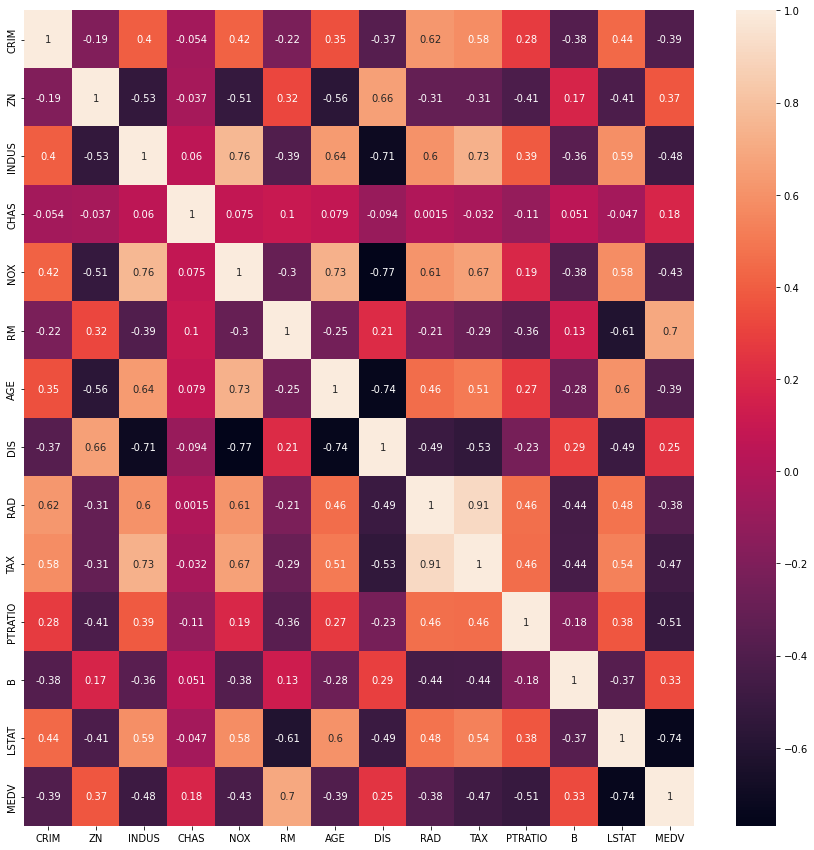

In [ ]:
# Correlation of the columns shown in a heatmap

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True);

##3. Data Manipulation
3.1. Data Quality Check

3.2. Handling Missing Data

##3.1 Data Quality Check

In [ ]:
#Checking Null value
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
#Data Null Value
df.isna().mean()

CRIM       0.039526
ZN         0.039526
INDUS      0.039526
CHAS       0.039526
NOX        0.000000
RM         0.000000
AGE        0.039526
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.039526
MEDV       0.000000
dtype: float64

##3.2. Handling Missing Value

In [ ]:
#Fill missing value

df_fill = df.fillna(df.mean())
df.shape, df_fill.shape

((506, 14), (506, 14))

In [ ]:
#Compare data statistic
df.iloc[:, [0,1,2,3,6,12]].describe(), df_fill.iloc[:, [0,1,2,3,6,12]].describe()

(             CRIM          ZN       INDUS        CHAS         AGE       LSTAT
 count  486.000000  486.000000  486.000000  486.000000  486.000000  486.000000
 mean     3.611874   11.211934   11.083992    0.069959   68.518519   12.715432
 std      8.720192   23.388876    6.835896    0.255340   27.999513    7.155871
 min      0.006320    0.000000    0.460000    0.000000    2.900000    1.730000
 25%      0.081900    0.000000    5.190000    0.000000   45.175000    7.125000
 50%      0.253715    0.000000    9.690000    0.000000   76.800000   11.430000
 75%      3.560263   12.500000   18.100000    0.000000   93.975000   16.955000
 max     88.976200  100.000000   27.740000    1.000000  100.000000   37.970000,
              CRIM          ZN       INDUS        CHAS         AGE       LSTAT
 count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000
 mean     3.611874   11.211934   11.083992    0.069959   68.518519   12.715432
 std      8.545770   22.921051    6.699165    0.250

Missing Data sudah diisi dengan nilai rata2 masing-masing kolom, sehingga tidak merubah karakteristik data secara keseluruhan

##4. Modelling Preparation

4.1. Checking distribution

4.2. Handling Outliers

4.3. Train Test data split

##4.1. Checking Distribution

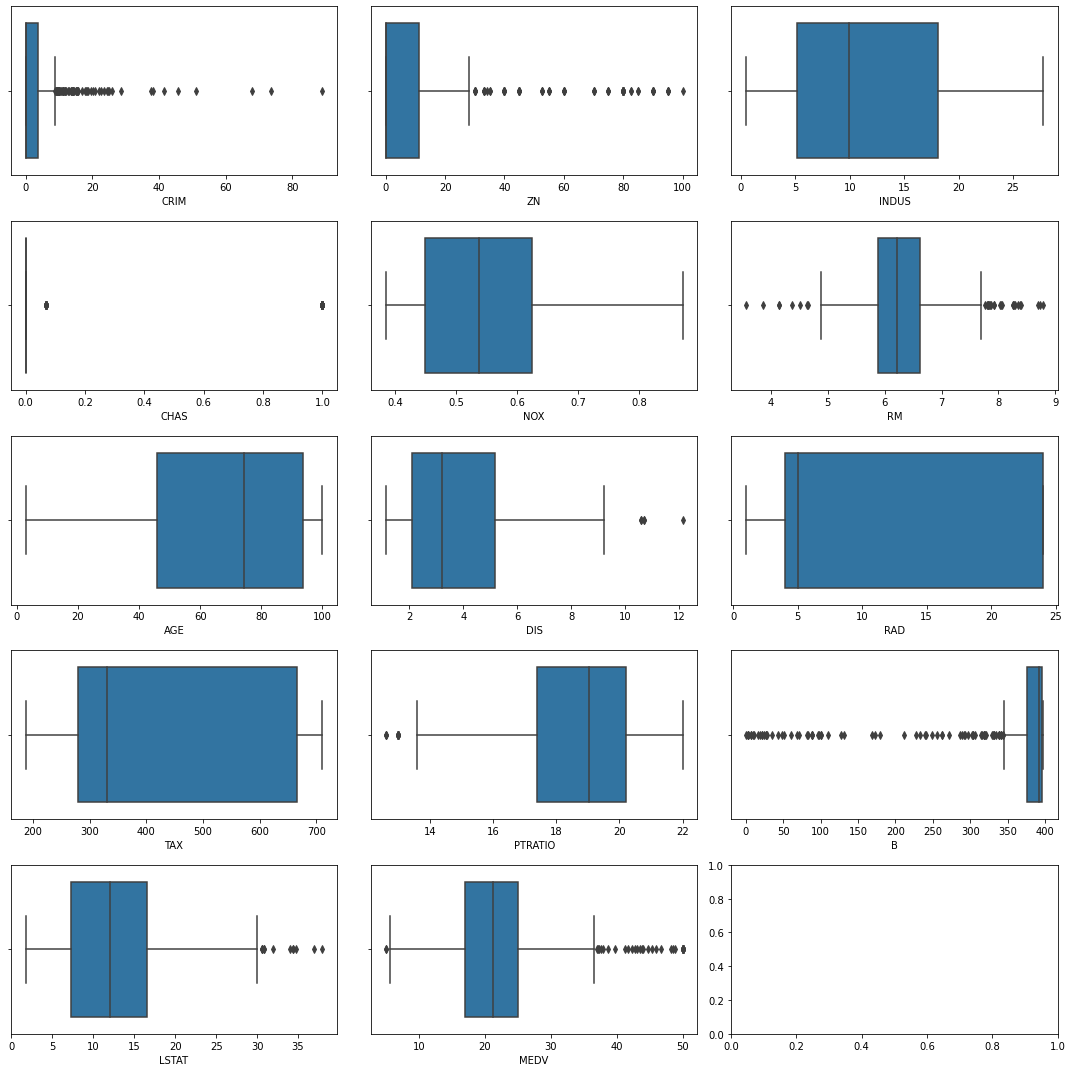

In [ ]:
#Checking for distributions
num_rows = (len(df_fill.columns) + 2) // 3  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,15))

# Create a boxplot for each column in the DataFrame
for i, col in enumerate(df_fill.columns):
    sns.boxplot(data=df_fill, x=col, ax=axes[i // 3, i % 3])
plt.tight_layout()
plt.show()

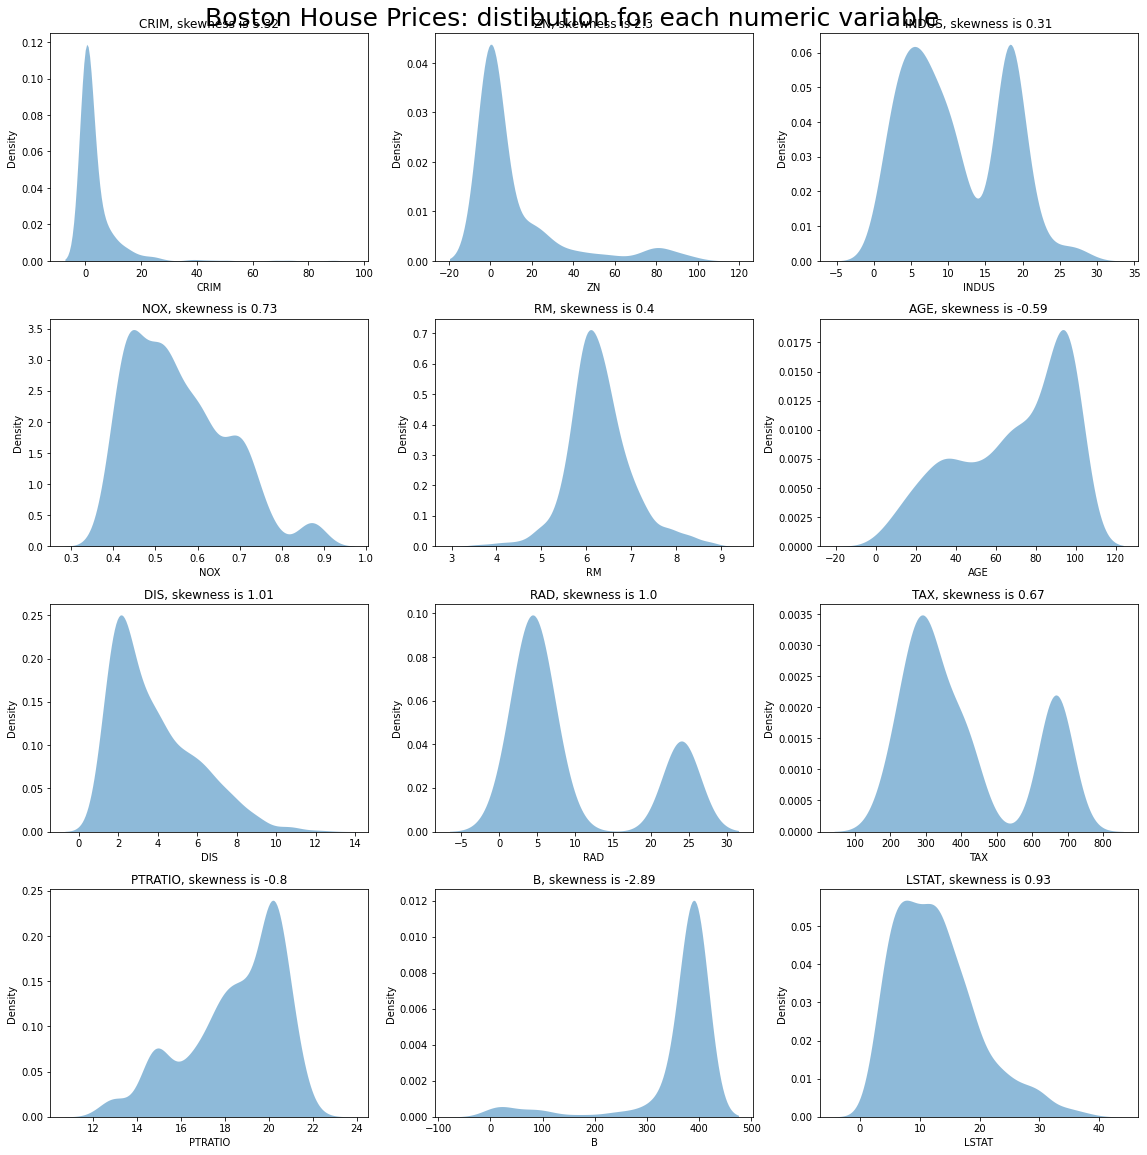

In [ ]:


# Checking for distributions
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(16,16))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True,  alpha=.5, linewidth=0)
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

columns_boston = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
dist_custom(dataset=df_fill, columns_list= columns_boston, rows=4, cols=3, suptitle='Boston House Prices: distibution for each numeric variable')
plt.tight_layout()

We can see the data have "outliers", so we have to deal with it

##4.2. Handling Outliers

In [ ]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
                
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers
        outlier_list_column = df_fill[(df_fill[column] < Q1 - outlier_step) | (df_fill[column] > Q3 + outlier_step )].index
        
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df_fill[df_fill[column] < Q1 - outlier_step]
    df2 = df_fill[df_fill[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers:', df1.shape[0]+df2.shape[0])
    
    return multiple_outliers

In [ ]:

Outliers_IQR = IQR_method(df_fill,1,columns_boston)
# dropping outliers
df2 = df_fill.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers: 12


In [ ]:
df2.shape, df_fill.shape, df.shape

((454, 14), (506, 14), (506, 14))

##4.3. Train Test Data Split

In [ ]:
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

In [ ]:
# import libraries
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
train.shape, test.shape

((317, 14), (137, 14))

In [ ]:
train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

##4.4 Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [ ]:
col_names = ['CRIM', 'ZN','CHAS', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

In [ ]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

#5. Modelling

5.1. Regression Linear

5.2. RandomForest

5.3. Ridge Regression

5.4. XGboost

5.5. Recursive Feature Elimination (RFE)



In [ ]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    
    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    return R2, adjusted_r2, CV_R2, RMSE
    
    print('RMSE:', round(RMSE,4))
    print('R2:', round(R2,4))
    print('Adjusted R2:', round(adjusted_r2, 4) )
    print("Cross Validated R2: ", round(cv_score.mean(),4) )

###5.1 Regression Linear

In [ ]:
from sklearn.linear_model import LinearRegression

# Creating and training model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = lm.predict(X_test)

In [ ]:
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [ ]:
ndf = [Reg_Models_Evaluation_Metrics(lm,X_train,y_train,X_test,y_test,y_pred)]

lm_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
lm_score.insert(0, 'Model', 'Linear Regression')
lm_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Linear Regression,0.569947,0.524495,0.666387,5.30638


###5.2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Creating and training model
RandomForest_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [ ]:
RandomForest_reg.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = RandomForest_reg.predict(X_test)

In [ ]:
ndf = [Reg_Models_Evaluation_Metrics(RandomForest_reg,X_train,y_train,X_test,y_test,y_pred)]

rf_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rf_score.insert(0, 'Model', 'Random Forest')
rf_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest,0.717532,0.687677,0.760954,4.300533


###5.3. Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# Creating and training model
ridge_reg = Ridge(alpha=3, solver="cholesky")

In [ ]:
ridge_reg.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = ridge_reg.predict(X_test)

In [ ]:
ndf = [Reg_Models_Evaluation_Metrics(ridge_reg,X_train,y_train,X_test,y_test,y_pred)]

rr_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rr_score.insert(0, 'Model', 'Ridge Regression')
rr_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Ridge Regression,0.568658,0.523069,0.668427,5.314328


###5.4. XGBoost

In [ ]:
from xgboost import XGBRegressor
# create an xgboost regression model
XGBR = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8)

In [ ]:
XGBR.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = XGBR.predict(X_test)

[07:20:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
ndf = [Reg_Models_Evaluation_Metrics(XGBR,X_train,y_train,X_test,y_test,y_pred)]

XGBR_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
XGBR_score.insert(0, 'Model', 'XGBoost')
XGBR_score

[07:21:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:21:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:21:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:21:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:21:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:21:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:21:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:21:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,XGBoost,0.789208,0.76693,0.805659,3.715046


###5.5. Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

# create pipeline
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=60)
model = RandomForestRegressor()
rf_pipeline = Pipeline(steps=[('s',rfe),('m',model)])

In [ ]:
rf_pipeline.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = rf_pipeline.predict(X_test)

In [ ]:
ndf = [Reg_Models_Evaluation_Metrics(rf_pipeline,X_train,y_train,X_test,y_test,y_pred)]

rfe_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rfe_score.insert(0, 'Model', 'Random Forest with RFE')
rfe_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest with RFE,0.781685,0.758611,0.778691,3.780759


##6. Final Model Evaluation

In [ ]:
predictions = pd.concat([rfe_score, XGBR_score, rr_score, rf_score, lm_score], ignore_index=True, sort=False)
predictions

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest with RFE,0.781685,0.758611,0.778691,3.780759
1,XGBoost,0.789208,0.766930,0.805659,3.715046
2,Ridge Regression,0.568658,0.523069,0.668427,5.314328
3,Random Forest,0.717532,0.687677,0.760954,4.300533
4,Linear Regression,0.569947,0.524495,0.666387,5.306380
